<img src="../figures/logo.jpg">

# DAY ONE: WORD EMBEDDINGS

This tutorial is split into three parts:
1. Investigating pre-trained embeddings looking at finding most similar words and computing word-vector maths
2. Creating our own embeddings
3. Comparing our embeddings with the pre-trained embeddings
    
Prior to beginning, please ensure you have downloaded the data and installed the python packages detailed in the environment.yaml file.

<img src="../figures/DayOneChallenge.png">


Please submit all results via https://forms.gle/RPjt4af7smMToq4z8 by 11:59pm GMT on 15 June 2021. 


### Notebook set-up
Importing all the packages that we will need for this tutorial 

In [1]:
## Uncomment if running on CoLab|
#!pip install gensim==4.0.1

In [2]:
import os
import requests

import gensim
import nltk
from wordcloud import WordCloud

import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

nltk.download('punkt')

%matplotlib inline

/Users/cebirnie/anaconda3/envs/mlg_summer_school_day1/lib/python3.9/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
[nltk_data] Downloading package punkt to /Users/cebirnie/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


The imported packages include:

- **gensim** :  https://pypi.org/project/gensim/

    This is the primary package we will be using for generating and using the word embeddings.
    
    
- **nltk** : https://www.nltk.org/

    This is the package we will use for processing of the text data prior to its conversion to word embeddings. The 'punkt' extension is to provide sentence tokenisation. (Tokenisation will be discussed below.)
 
 
 - **wordcloud** : https://pypi.org/project/wordcloud/

    We will use this package to create wordclouds to help us gain a visual understanding of the content of our corpus.
    
    
- **pandas** : https://pandas.pydata.org/

    We will use this package to aid our comparison between the pre-trained and custom-made embeddings, as well as to load in our corpus.

# PART 1: Getting to grips with pre-trained word embeddings

In this section we are going to use pre-trained word embeddings, look at word similarity and perform some vector maths.

The word vectors have been downloaded from: http://vectors.nlpl.eu/repository/ a resource by the University of Oslo where you will find many more pretrained word embeddings.

The downloaded embeddings are loaded using the Gensim Python package. 

**Load the pre-trained vectors from file, I assume they have been placed into a folder called data that is one level up**

In [3]:
## Uncomment if running on CoLab
#from google.colab 
#import drive
#drive.mount('/content/drive’)

In [4]:
# Data directory
data_dir = "../data/"
#data_dir = '/content/drive/MyDrive/'  # Uncomment if running on CoLab

# Load vectors 
wikiemb_path = os.path.join(data_dir, "wiki_w2v.bin")
wiki_vecs = gensim.models.KeyedVectors.load_word2vec_format(wikiemb_path, binary=True)

## Word Similarity

Using the cosine distance we can compute the similarity between neighbouring words.

We are going to use the function: https://tedboy.github.io/nlps/generated/generated/gensim.models.Word2Vec.most_similar.html

In [5]:
# Check out the documentation of the function
wiki_vecs.most_similar?

**Example: How to find 10 most similar word to `happy`**

In [6]:
wiki_vecs.most_similar(positive=['happy'])

[('glad', 0.7448184490203857),
 ('happier', 0.7363366484642029),
 ('sad', 0.7319260835647583),
 ('delighted', 0.7051303386688232),
 ('unhappy', 0.6934170126914978),
 ('thrilled', 0.6881834864616394),
 ('pleased', 0.6878653764724731),
 ('happily', 0.686674177646637),
 ('loving', 0.6830177903175354),
 ('nice', 0.6688732504844666)]

**To do:**
1. Find the 10 most similar words to `education`
2. Find the most similar word to `science`
3. Advanced: Find the least similar word to `happy`

In [7]:
# Find the 10 most similar words to education
wiki_vecs.most_similar(positive=['education'])

[('educations', 0.7181491255760193),
 ('vocational', 0.6834912896156311),
 ('schooling', 0.6737391948699951),
 ('educational', 0.6717845797538757),
 ('post-secondary', 0.6522613167762756),
 ('teacher-training', 0.6211991906166077),
 ('postsecondary', 0.6188101172447205),
 ('curricula', 0.6134375929832458),
 ('k-12', 0.6039371490478516),
 ('curriculum', 0.6020159721374512)]

In [8]:
# Find the most similar word to science
wiki_vecs.most_similar(positive=['science'], topn=1)

[('sciences', 0.6803816556930542)]

In [9]:
# Advanced: Find the least similar word to happy
wiki_vecs.most_similar(negative=['happy'], topn=1)

[('Dataset', 0.08874545991420746)]

## Basic word vector maths

Similar to how we identified the most similar words to a single word, as the words are in a vector format then we can combine the vectors and find the most similar word to the combination of the vectors. Such vector summations equal the equivalent of analogies in the language domain. 

Again, here we shall be using word2vec's `most_similar` function, but this time instead of passing a single word as either positive or negative, we will pass in a list of words.

In [10]:
# Looking back at the documentation notice that the input to 'positive' and 'negative' are lists
wiki_vecs.most_similar?

**Example: What is the female equivalent of a king?** 

In [11]:
print (wiki_vecs.most_similar(positive=["king", "woman"], negative = ["man"])[0])

('queen', 0.7168769240379333)


Explanation: To understand which vectors should be summed versus subtracted consider what the analogy is. In this scenario, we start with the positive king vector and we wish to remove the male vector and add the female. As such the equation would be: **king-man+woman**

**Example 2: What is the capital of England?**

In [12]:
print (wiki_vecs.most_similar(positive=["Oslo", "England"], negative = ["Norway"]))

[('London', 0.6139545440673828), ('Birmingham', 0.5341491103172302), ('Liverpool', 0.5297476053237915), ('Bournemouth', 0.5210239887237549), ('Wolverhampton', 0.520953893661499), ('Manchester', 0.5198856592178345), ('Taunton', 0.5170389413833618), ('Westcliff-on-Sea', 0.5153756737709045), ('Chorlton-cum-Hardy', 0.5129683017730713), ('Hertfordshire', 0.5121408104896545)]


Explanation: In this example we were not told which analogy to use therefore we had to understand the the question is asking about a country and its capital city and use this to make our own analogy. In this case we used the equation: **Oslo-Norway+England**

**To do:**
1. Repeat example 2 with your own analogy to find the capital of Scotland
2. Write your own analogy and equation to compute the past tense of run
3. Write your own analogy and equation to determine the colour of the sky
4. Advanced: We do not always need 3 components to the equation. Answer the following: What is a king if he is not a royal?

In [13]:
# Repeat example 2 with your own analogy to find the capital of Scotland
wiki_vecs.most_similar(positive=["London", "Scotland"], negative = ["England"])

[('Edinburgh', 0.6982982754707336),
 ('Glasgow', 0.6954310536384583),
 ('Inverness', 0.5591338276863098),
 ('Belfast', 0.5415579080581665),
 ('Dundee', 0.5304673910140991),
 ('Strathspey', 0.528846263885498),
 ('Aberdeen', 0.5286348462104797),
 ('Springburn', 0.5278140902519226),
 ('Scottish', 0.5237998962402344),
 ('Leith', 0.5227293372154236)]

In [14]:
# Write your own analogy and equation to compute the past tense of run
wiki_vecs.most_similar(positive=["swam", "run"], negative = ["swim"])

[('ran', 0.7294111251831055),
 ('running', 0.5970238447189331),
 ('runs', 0.534817636013031),
 ('drove', 0.41926050186157227),
 ('Running', 0.41343173384666443),
 ('raced', 0.3861052095890045),
 ('Buckhalter', 0.37644198536872864),
 ('2-run', 0.37179049849510193),
 ('operated', 0.3680531978607178),
 ('dueled', 0.3653784990310669)]

In [15]:
# Write your own analogy and equation to determine the colour of the sky
wiki_vecs.most_similar(positive=["green", "sky"], negative = ["grass"])

[('bright', 0.5842812061309814),
 ('blue', 0.5746225714683533),
 ('glows', 0.5646685361862183),
 ('dark', 0.5261755585670471),
 ('blue/green', 0.5183888673782349),
 ('bluer', 0.5010091066360474),
 ('rainbow-colored', 0.499303936958313),
 ('red', 0.49894851446151733),
 ('orange', 0.49623826146125793),
 ('occulting', 0.4946475923061371)]

In [16]:
# Advanced: We do not always need 3 components to the equation. 
# Answer the following: What is a king if he is not a royal?
wiki_vecs.most_similar(positive=["king"], negative = ["royalty"])

# Note, this does not give the answers in which we would have expected highlighting the limitations of word embeddings

[('co-king', 0.41127705574035645),
 ('duke', 0.39697909355163574),
 ('usurper', 0.389462411403656),
 ('kingdom', 0.3848867416381836),
 ('ruler', 0.37678200006484985),
 ('Hattusili', 0.370589941740036),
 ('Northumbrians', 0.3705673813819885),
 ('regent', 0.3701588809490204),
 ('Leovigild', 0.3695882558822632),
 ('Antigonus', 0.3695214092731476)]

# PART 2: Creating our own word embeddings

In this section we are going to generate our own word embeddings from geoscientific texts. 

To do so we will need to: 
1. read in our corpus (geoscientific text),
2. perform any necessary processing of the corpus,
3. compute the word vectors


### 2.1 Data loading
Iraya Energies has very kindly provided the corpus for this summer school. The corpus is composed of summaries of geoscience conference abstracts and journal papers. The default option is to have the token as an environment variable. However, you can also just copy-paste if easier. (This token is NOT to be shared beyond the summer school participants.)


In [17]:
# setup credentials
#token = 'Token %s'%('$TOKEN') # copy-paste token
token = 'Token %s'% os.environ['IRAYATOKEN']

data_list = []
pages = range(1,12)
for p in pages:
    print('page: %u'%p)
    headers = {"Content-type": "application/json", 
               "Authorization": token}
    
    # fetch data - with page number: we have 11 pages in total
    r = requests.get("https://demo.atelier.irayaenergies.ai/data-tracker/extracted-info?page=%i"%p, headers=headers)
    data = r.json()
    data["data"][0]
    data_list.append(data["data"])
    
data_list = [item for sublist in data_list for item in sublist]

page: 1
page: 2
page: 3
page: 4
page: 5
page: 6
page: 7
page: 8
page: 9
page: 10
page: 11


In [18]:
data_list[0]

{'type': 'Extracted_Info',
 'id': '5360133c-6f45-4e2e-afd0-ea60723db0a3',
 'attributes': {'classification': 'text',
  'page_num': 1,
  'par_num': 1,
  'doc_text': 'The phase and group velocity surfaces are essential for wave propagation in anisotropic media. These surfaces have certain features that, especially, for shear waves result in complications for modelling and inversion of recorded wavefields. To analyse wave propagation in an anisotropic model, it is important to identify these features in both the phase and group domains. We propose few characteristics for this analysis: the energy flux angle, decomposed in the polar and azimuth angle correction angles and enhancement factor, which is able to characterize both singularity points and triplication zones. The very simple equation that controls the triplications is derived in the phase domain. The proposed characteristics are illustrated for elastic and acoustic anisotropic models of different symmetry classes.',
  'doc_text_tra

In this tutorial we are only interested in the summaries of the documents so let us just extract out that information from the dataframe.

In [19]:
geotexts = [d['attributes']['doc_text'] for d in data_list]

**BACKUP:** 
In the instance that the data connector does not work for you, you can download the flat file from the shared G-Drive. This file is to be deleted upon completion of the summer school and is not to be distributed further. I assume that this is in the same location as the wiki embeddings.

To load the data in from this location, make a new cell with the following commands:
```
geodata = pd.read_json(os.path.join(data_dir, "document_info.json"))
geodata.head()
geotexts = geodata['doc_text'].values.tolist()```

We now have a list of summaries. First, lets check how many summaries we have:

In [20]:
len(geotexts)

1047

And lets look at the first few summaries

In [21]:
geotexts[:3]

['The phase and group velocity surfaces are essential for wave propagation in anisotropic media. These surfaces have certain features that, especially, for shear waves result in complications for modelling and inversion of recorded wavefields. To analyse wave propagation in an anisotropic model, it is important to identify these features in both the phase and group domains. We propose few characteristics for this analysis: the energy flux angle, decomposed in the polar and azimuth angle correction angles and enhancement factor, which is able to characterize both singularity points and triplication zones. The very simple equation that controls the triplications is derived in the phase domain. The proposed characteristics are illustrated for elastic and acoustic anisotropic models of different symmetry classes.',
 'Optimized experimental design aims at reducing the cost of a seismic survey by identifying the optimal locations and amounts of sources and receivers. While the acquisition de

## 2.2 Pre-processing the text

The first thing we must do is convert the strings of words into lists of tokens (where a token indicates what is separated by a space). We will use the nltk package to do this. After doing so, we will quickly analyse our corpus and look at different preprocessing.

In [22]:
# Join lines together so it becomes one long line
text = " ".join(geotexts)

# Separate out the sentences 
sentences = nltk.sent_tokenize(text)

# Seperate out each word within each sentence
tokenised_sents = [nltk.word_tokenize(sent) for sent in sentences]

In [23]:
# Let us look at our first sentence, now that it has been tokenised
tokenised_sents[0]

['The',
 'phase',
 'and',
 'group',
 'velocity',
 'surfaces',
 'are',
 'essential',
 'for',
 'wave',
 'propagation',
 'in',
 'anisotropic',
 'media',
 '.']

**Example: how many tokens do we have in total?**

In [24]:
total_tokens = [t for sent in tokenised_sents for t in sent]

print ('Total number of tokens: %i'%len(total_tokens))

Total number of tokens: 160321


(-0.5, 1499.5, 1199.5, -0.5)

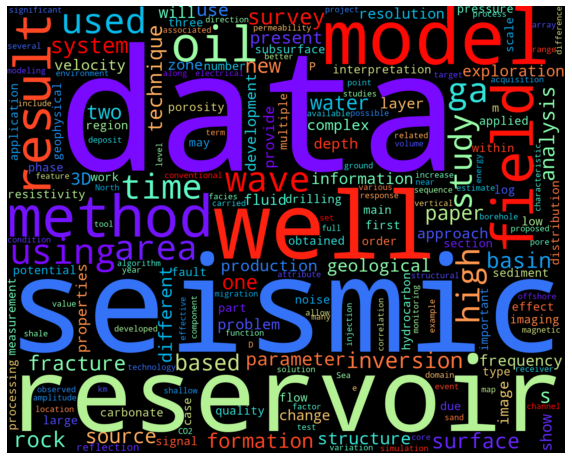

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(10, 15))
wordcloud = WordCloud(width=1500, height=1200, margin=0,
                      colormap='rainbow',
                      collocations=False).generate(' '.join(total_tokens))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")

**To do:**
1. How many unique tokens do we have?
2. Lowercase all the tokens
3. Advanced: stem each token (hint: check out https://www.nltk.org/howto/stem.html)

In [26]:
# How many unique tokens do we have?
len(set(total_tokens))

14991

In [27]:
# Lowercase all the tokens
print('Original: ', total_tokens[:10])
lowered_tokens = [t.lower() for t in total_tokens]
print('Lowered: ', lowered_tokens[:10])

Original:  ['The', 'phase', 'and', 'group', 'velocity', 'surfaces', 'are', 'essential', 'for', 'wave']
Lowered:  ['the', 'phase', 'and', 'group', 'velocity', 'surfaces', 'are', 'essential', 'for', 'wave']


In [28]:
# Advanced: stem each token (hint: check out https://www.nltk.org/howto/stem.html)
print('Original: ', total_tokens[:10])
stemmer = nltk.SnowballStemmer("norwegian")
stemmed_tokens = [stemmer.stem(t) for t in total_tokens]
print('Stemmed: ', stemmed_tokens[:10])

Original:  ['The', 'phase', 'and', 'group', 'velocity', 'surfaces', 'are', 'essential', 'for', 'wave']
Stemmed:  ['the', 'phas', 'and', 'group', 'velocity', 'surfac', 'are', 'essential', 'for', 'wav']


## 2.3 Compute the word embeddings

We are going to use gensim's modelling package: https://radimrehurek.com/gensim/models/word2vec.html

In the first example we will use the tokenised sentences with minimal preprocessing and follow the same modelling methodology as was used for the wiki embeddings: 
- Skipgram approach
- Vector size of 300

In [29]:
# Let us look at the doc string for the function we will use to create the embeddings
gensim.models.Word2Vec?

**Example: Generating skipgram embeddings from our corpus**

In [39]:
# Skip-gram model
sg_geoscience = gensim.models.Word2Vec(tokenised_sents, sg=1, min_count=2, window=5, vector_size=300)
sg_geoscience.train(tokenised_sents, total_examples=len(tokenised_sents), epochs=100)

(11109826, 16032100)

In [31]:
# Lets access the embeddings and see how many were created?
len(sg_geoscience.wv.vectors)

7305

**To do:**
1. Vary the size of the vector, how does this influence training time? (hint: use %%timeit)
2. Change the min_count, how does this influence the number of embeddings created?
3. Advanced: create a new set of embeddings from a CBOW methodology (hint: look at the modelling documentation for class gensim.models.word2vec.Word2Vec on https://radimrehurek.com/gensim/models/word2vec.html)

In [32]:
%%timeit
# Vary the size of the vector, how does this influence training time? (hint: use %%timeit)
vector_size = 10
sg_geoscience = gensim.models.Word2Vec(tokenised_sents, sg=1, min_count=2, window=5, vector_size=vector_size)
sg_geoscience.train(tokenised_sents, total_examples=len(tokenised_sents), epochs=100)


49.8 s ± 13.6 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [33]:
%%timeit
# Vary the size of the vector, how does this influence training time? (hint: use %%timeit)
vector_size = 1000
sg_geoscience = gensim.models.Word2Vec(tokenised_sents, sg=1, min_count=2, window=5, vector_size=vector_size)
sg_geoscience.train(tokenised_sents, total_examples=len(tokenised_sents), epochs=100)

3min 14s ± 16.8 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [34]:
# Change the min_count, how does this influence the number of embeddings created?
sg_geoscience = gensim.models.Word2Vec(tokenised_sents, sg=1, min_count=1, window=5, vector_size=300)
sg_geoscience.train(tokenised_sents, total_examples=len(tokenised_sents), epochs=100)
print('Min count 1: ', len(sg_geoscience.wv.vectors))

sg_geoscience = gensim.models.Word2Vec(tokenised_sents, sg=1, min_count=5, window=5, vector_size=300)
sg_geoscience.train(tokenised_sents, total_examples=len(tokenised_sents), epochs=100)
print('Min count 5: ', len(sg_geoscience.wv.vectors))

Min count 1:  14991
Min count 5:  3475


In [35]:
# Advanced: create a new set of embeddings from a CBOW methodology
cbow_geoscience = gensim.models.Word2Vec(tokenised_sents, sg=0, min_count=2, window=5, vector_size=300)
cbow_geoscience.train(tokenised_sents, total_examples=len(tokenised_sents), epochs=100)

(11111430, 16032100)

# PART THREE: COMPARING THE EMBEDDINGS

Using the analysis techniques from Part 1 and the embeddings we created in Part 2. However, this time for our analysis we are going to focus on a goescientific use case. Therefore, all the terms and anologies will be geoscience-related. 

## 3.1 Comparison via similarity

**Example: We have created a little function to compare the most similar word to a specified word for both the premade and custom embeddings. In this example we look at the most similar words to the term 'shale'.**

In [36]:
def comparing_embeddings_similarity(word, g_emb, sg_emb):
    g    = pd.DataFrame(g_emb.most_similar(positive=[word])[:5],columns=["g_name","g_score"])
    sg   = pd.DataFrame(sg_emb.wv.most_similar(positive=[word])[:5],columns=["sg_name","sg_score"])
    
    df = pd.concat([g, sg],axis = 1)
    display (df)

In [40]:
word = 'shale' 

comparing_embeddings_similarity(word, wiki_vecs, sg_geoscience)

,g_name,g_score,sg_name,sg_score
0,shales,0.783693,Umr,0.443380
1,Shale,0.750160,Barnett,0.434575
2,oil-shale,0.711005,Nahr,0.412151
3,siltstone,0.696240,Fiqa,0.386840
4,dolostone,0.694625,About,0.381138


Some terms may not have been available in both corpi and therefore no embedding will exist for that term. In this scenario, our function will not work:

In [41]:
word = 'Marmousi' 
comparing_embeddings_similarity(word, wiki_vecs, sg_geoscience)

KeyError: "Key 'Marmousi' not present"

Then we can just look in the geoscience corpus at what is the most similar, as opposed to running a comparison of the two embeddings.

In [42]:
word = 'Marmousi' 

pd.DataFrame(sg_geoscience.wv.most_similar(positive=[word]),columns=["sg_name","sg_score"])

,sg_name,sg_score
0,SEG/EAGE,0.644644
1,implementations,0.589921
2,Marmousi‐2,0.563618
3,Foothill,0.528362
4,non‐quadratic,0.478519
5,transforming,0.467673
6,overcomes,0.458949
7,CC,0.457421
8,White,0.454984
9,Bottom,0.453770


**To do:**
1. What is the most similar term to wave?
2. What is the most similar term to migration?
3. Advanced: Incorporate the custom made CBoW embeddings from Part 2 into the function and rerun the similarity studies.
4. Advanced: Add an option into the function to return the least similar words

In [43]:
# What is the most similar term to wave?
word = 'wave' 
comparing_embeddings_similarity(word, wiki_vecs, sg_geoscience)

,g_name,g_score,sg_name,sg_score
0,waves,0.784538,standing,0.397512
1,P-wave,0.551481,modulus,0.390438
2,surge,0.500229,equation,0.390317
3,Wave,0.491153,elliptically,0.387841
4,ripples,0.488759,shear,0.372476


In [44]:
# What is the most similar term to migration?
word = 'migration' 
comparing_embeddings_similarity(word, wiki_vecs, sg_geoscience)

,g_name,g_score,sg_name,sg_score
0,migrations,0.782709,3‐D,0.469758
1,migrating,0.739465,pathways,0.457073
2,emigration,0.685142,strict,0.427170
3,migrate,0.662185,imprint,0.416871
4,migrants,0.644089,treats,0.388429


In [45]:
# Advanced: Incorporate the custom made CBoW embeddings from Part 2 into the function and rerun the similarity studies.

def comparing_embeddings_similarity_ext(word, g_emb, sg_emb, cbow_emb):
    g    = pd.DataFrame(g_emb.most_similar(positive=[word])[:5],columns=["g_name","g_score"])
    sg   = pd.DataFrame(sg_emb.wv.most_similar(positive=[word])[:5],columns=["sg_name","sg_score"])
    cbow   = pd.DataFrame(cbow_emb.wv.most_similar(positive=[word])[:5],columns=["cbow_name","cbow_score"])
    
    df = pd.concat([g, sg, cbow],axis = 1)
    display (df)

In [46]:
# What is the most similar term to wave?
comparing_embeddings_similarity_ext('wave', wiki_vecs, sg_geoscience, cbow_geoscience)
# What is the most similar term to migration?
comparing_embeddings_similarity_ext('migration', wiki_vecs, sg_geoscience, cbow_geoscience)

,g_name,g_score,sg_name,sg_score,cbow_name,cbow_score
0,waves,0.784538,standing,0.397512,waves,0.543876
1,P-wave,0.551481,modulus,0.390438,S-waves,0.435677
2,surge,0.500229,equation,0.390317,NMO,0.385628
3,Wave,0.491153,elliptically,0.387841,wavefields,0.356319
4,ripples,0.488759,shear,0.372476,geomagnetic,0.350679


,g_name,g_score,sg_name,sg_score,cbow_name,cbow_score
0,migrations,0.782709,3‐D,0.469758,pathways,0.476243
1,migrating,0.739465,pathways,0.457073,prestack,0.401062
2,emigration,0.685142,strict,0.427170,3‐D,0.367926
3,migrate,0.662185,imprint,0.416871,pre-stack,0.350491
4,migrants,0.644089,treats,0.388429,FWI,0.331560


In [47]:
# Advanced: Add an option into the function to return the least similar words
def comparing_embeddings_similarity_ext_neg(word, g_emb, sg_emb, cbow_emb):
    g    = pd.DataFrame(g_emb.most_similar(negative=[word])[:5],columns=["g_name","g_score"])
    sg   = pd.DataFrame(sg_emb.wv.most_similar(negative=[word])[:5],columns=["sg_name","sg_score"])
    cbow   = pd.DataFrame(cbow_emb.wv.most_similar(negative=[word])[:5],columns=["cbow_name","cbow_score"])
    
    df = pd.concat([g, sg, cbow],axis = 1)
    display (df)

In [48]:
# What is the least similar term to wave?
comparing_embeddings_similarity_ext_neg('wave', wiki_vecs, sg_geoscience, cbow_geoscience)
# What is the least similar term to migration?
comparing_embeddings_similarity_ext_neg('migration', wiki_vecs, sg_geoscience, cbow_geoscience)

# Note, these have no meanings it is to illustrate how to manipulate the vectors

,g_name,g_score,sg_name,sg_score,cbow_name,cbow_score
0,Grizzard,0.147626,undertaken,0.068007,future,0.337218
1,Elder,0.133526,Africa,0.051118,succeeded,0.315091
2,Iglehart,0.126053,freshwater,0.050216,historically,0.288629
3,Ginter,0.122665,caprock,0.046916,Jauf,0.279919
4,Gwaltney,0.117249,planned,0.042535,tied,0.270062


,g_name,g_score,sg_name,sg_score,cbow_name,cbow_score
0,Satchell,0.122963,against,0.072835,Log,0.323806
1,Rawlings,0.122961,countries,0.072298,GTL,0.318218
2,Ramsdell,0.120734,excess,0.068468,eight,0.317179
3,Cointreau,0.119880,regard,0.063835,1.6,0.295574
4,Spork,0.117218,extends,0.058305,documented,0.286426


## 3.2 Comparison with vector maths

**Example: Let us now consider the word vector maths. In this case let us consider the coal equivalent of a salt dome.**

In [49]:
print (wiki_vecs.most_similar(positive=["dome", "coal"],negative=["salt"]))
print('')
print (sg_geoscience.wv.most_similar(positive=["dome", "coal"],negative=["salt"]))

[('cupola', 0.5283207893371582), ('domes', 0.511414647102356), ('round-topped', 0.49815085530281067), ('roof', 0.4923069179058075), ('domed', 0.48560717701911926), ('smokestack', 0.48251205682754517), ('firebox', 0.4752655625343323), ('trainshed', 0.4744787812232971), ('chimneys', 0.47257155179977417), ('skylight', 0.46635544300079346)]

[('Selar', 0.45956331491470337), ('Cornish', 0.44666236639022827), ('hvBb', 0.4241720139980316), ('organic-rich', 0.4075920581817627), ('seam', 0.4070611298084259), ('semi-anthracite', 0.4070241451263428), ('dunes', 0.3967294991016388), ('ash', 0.3887448012828827), ('inhomogeneities', 0.3849823772907257), ('mylonite', 0.37967780232429504)]


**To do:**
1. Determine what is the shear equivalent of a P-wave
2. Write your own geoscience analogy (see https://www.earthdoc.org/docserver/fulltext/fb/38/7/fb2020051.pdf?expires=1619893516&id=id&accname=fromqa190&checksum=9E55711AF8CF1D67250F04B959D084CD for inspiration)
3. Advanced: Recreate the similarity function for multiple word inputs
3. Advanced: Incroporate CBoW into your new function for the results comparison 

In [50]:
# Determine what is the shear equivalent of a P-wave
print (sg_geoscience.wv.most_similar(positive=["P-wave", "shear"],negative=["compressional"]))

[('SH-wave', 0.3846701681613922), ('landstreamers', 0.33662986755371094), ('converted-wave', 0.3270159959793091), ('minimal', 0.3231823444366455), ('AVO', 0.3095593750476837), ('subtracted', 0.30086398124694824), ('recharging', 0.30084118247032166), ('single-sensor', 0.2972397804260254), ('circulating', 0.2950926125049591), ('geophone', 0.29507991671562195)]


In [51]:
# Write your own geoscience analogy
print (sg_geoscience.wv.most_similar(positive=["seal", "sandstone"],negative=["mudstone"]))

[('Stø', 0.3461543619632721), ('cap', 0.32331418991088867), ('interfacial', 0.2885735034942627), ('possibility', 0.2682103216648102), ('breach', 0.2594580054283142), ('flooded', 0.24426130950450897), ('Yantata', 0.2440614253282547), ('recovery', 0.24324025213718414), ('saline', 0.2431129515171051), ('solubility', 0.2428215891122818)]


In [52]:
# Advanced: Recreate the similarity function for multiple word inputs
# Advanced: Incroporate CBoW into your new function for the results comparison
def comparing_embeddings_analogies(pwords, nwords, g_emb, sg_emb, cbow_emb):
    g    = pd.DataFrame(g_emb.most_similar(positive=pwords, negative=nwords, topn=5),
                        columns=["g_name","g_score"])
    sg   = pd.DataFrame(sg_emb.wv.most_similar(positive=pwords, negative=nwords, topn=5),
                        columns=["sg_name","sg_score"])
    cbow   = pd.DataFrame(cbow_emb.wv.most_similar(positive=pwords, negative=nwords, topn=5),
                          columns=["cbow_name","cbow_score"])
    
    df = pd.concat([g, sg, cbow],axis = 1)
    display (df)

In [53]:
comparing_embeddings_analogies(["seal", "sandstone"], 
                               ["mudstone"],
                               wiki_vecs, 
                               sg_geoscience, 
                               cbow_geoscience)

,g_name,g_score,sg_name,sg_score,cbow_name,cbow_score
0,seals,0.596922,Stø,0.346154,destruction,0.433136
1,stone,0.503519,cap,0.323314,percentage,0.372515
2,sealing,0.492284,interfacial,0.288574,CO2,0.371593
3,emblem,0.469499,possibility,0.268210,trap,0.371388
4,eagle,0.461364,breach,0.259458,heterogeneity,0.361620


# Final task: vary all the hyperparameters of the pipeline for embedding creation (part two) and see how it changes the results in part three.

<img src="../figures/DayOneChallenge.png">